<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [16]:
# Command(s)
print("Total NaN's by column:")
print(auto.isnull().sum())
print('\n',"Total NaN's in dataframe: ",auto.isnull().sum().sum())

Total NaN's by column:
mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

 Total NaN's in dataframe:  5


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [25]:
# Command:
auto[pd.isnull(auto).any(axis=1)]
# Comment (One - two sentence)
# Horsepower is the only feature with missing values, though there isn't a readily available explanation.
# Plotting a histogram of the values of HP does not show any obvious binning which would indicate poor data collection methodology.
# Perhaps understanding more about the data collection process would provide an explanation.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [29]:
# Command(s):
auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].median())

# Comment (one sentence):
# The HP feature has a lot of variance in it, so using the median is probably not the best option.
# There is also almost certainly very strong relationship between the HP and the other features, so imputation would be better.

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [40]:
# Develop the model 
import statsmodels.api as sm

y = auto['mpg']
X = auto.drop('mpg',axis=1)

mod = sm.OLS(y,X).fit()
mod.summary()
# Comment on its quality 
# This model performs very well. An engine's mpg rating appears to be highly explained by the its own performance
# metrics. The high R^2 of .98 shows that the features here can adequately explain an engine's mpg rating.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2961.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:36:30   Log-Likelihood:                -1045.3
No. Observations:                 397   AIC:                             2105.
Df Residuals:                     390   BIC:                             2133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6770      0.324     -2.092      0.037      -1.313      -0.041
displacement     0.0212      0.008      2.780      0.006       0.006       0.036
horsepower      -0.0348      0.012     -2.820      0.005      -0.059      -0.011
weight          -0.0062      0.001     -9.673      0.000      -0.008      -0.005
acceleration    -0.0608      0.089     -0.682      0.495      -0.236       0.114
year             0.5820      0.024     24.186      0.000       0.535       0.629
origin           1.2785      0.279      4.576      0.000       0.729       1.828
==============================================================================
Omnibus:                       46.144   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.677   Prob(JB):                     2.13e-19
Kurtosis:                       4.834   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [59]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'statsmodels.api',
 'sklearn.preprocessing',
 'IPython.core.shadowns',
 'numpy',
 'builtins',
 'types',
 'pandas',
 'matplotlib.pyplot']

In [60]:
import pip #needed to use the pip functions
for i in pip.get_installed_distributions(local_only=True):
    print(i)

xlrd 1.1.0
xgboost 0.72
wrapt 1.10.11
widgetsnbextension 3.2.1
wheel 0.29.0
Werkzeug 0.14.1
webencodings 0.5.1
wcwidth 0.1.7
virtualenv 15.1.0
urllib3 1.22
traitlets 4.3.2
tqdm 4.19.6
tornado 4.5.1
torchvision 0.1.8
torch 0.1.12.post2
toolz 0.8.2
Theano 1.0.1
tflearn 0.3.1
testpath 0.3.1
terminado 0.6
tensorflow 1.4.1
tensorflow-tensorboard 0.4.0
tclab 0.3.1
sympy 1.0
statsmodels 0.8.0
ssh-import-id 5.6
SQLAlchemy 1.1.10
spyder 3.3.0
spyder-kernels 0.2.4
sphinxcontrib-websupport 1.0.1
Sphinx 1.6.5
snowballstemmer 1.2.1
smart-open 1.5.3
slycot 0.2.0
six 1.11.0
sip 4.19.8
simplegeneric 0.8.1
Shapely 1.6.4.post1
setuptools 35.0.2
sendgrid 4.1.0
selenium 3.4.3
SecretStorage 3.0.1
seaborn 0.7.1
scs 1.2.6
scipy 0.19.0
scikits.bootstrap 1.0.0
scikit-learn 0.19.1
rope 0.10.7
requests 2.18.4
QtPy 1.4.2
qtconsole 4.3.0
QtAwesome 0.4.4
pyzmq 16.0.2
PyYAML 3.12
pytz 2017.3
pythymiodw 1.0.4
python-http-client 2.2.1
python-editor 1.0.3
python-debian 0.1.28
python-dateutil 2.6.1
python-crfsuite 0.9.2

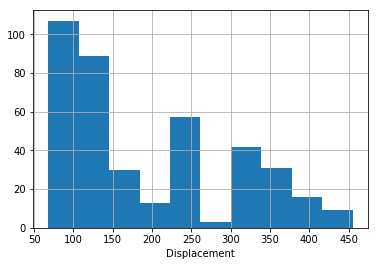

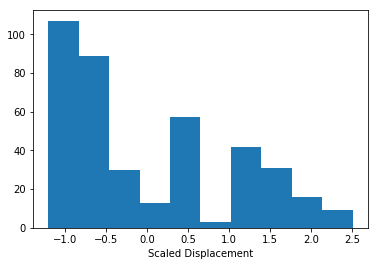

In [57]:
# Histogram of engine displacement
auto['displacement'].hist()
plt.xlabel('Displacement')
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution
import numpy as np
from sklearn import preprocessing

disp_scaled = preprocessing.scale(auto['displacement'])
plt.hist(disp_scaled,bins='auto')
plt.xlabel('Scaled Displacement')
plt.show()
#### Can't get the below to work... ####
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='box-cox',standardize=False)
# pt.fit_transform(auto['displacement']).hist()
# plt.show()


<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [ ]:
# Calculate then new model

# Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [ ]:
# Center and scale

# Recalculate the model

# Comment on its performance
